In [1]:
from Jaeminstarter import *

Using TensorFlow backend.
C:\Users\Melab\AppData\Local\Continuum\anaconda3\envs\venv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
img = imread('mask01.png')

In [3]:
from skimage import measure
all_labels = measure.label(img)
all_labels.shape

(1024, 1024)

C:\Users\Melab\AppData\Local\Continuum\anaconda3\envs\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


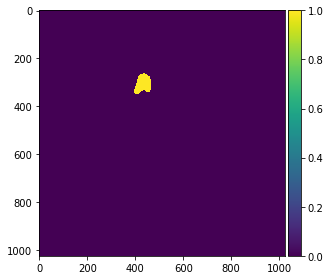

In [4]:
all_label_c2 = (all_labels==1)
imshow(all_label_c2)

In [5]:
blobs_labels = measure.label(img, background=0)

In [6]:
blobs_c3 = (blobs_labels == 2)

C:\Users\Melab\AppData\Local\Continuum\anaconda3\envs\venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


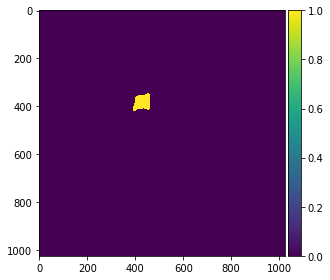

In [7]:
imshow(blobs_c3)

In [8]:
import cv2
import numpy as np

img = cv2.imread('mask01.png', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
ret, labels = cv2.connectedComponents(img)


In [9]:
type(labels)

numpy.ndarray

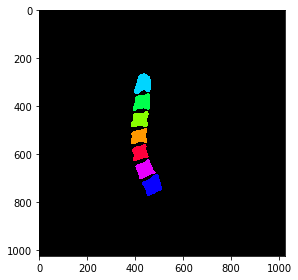

In [10]:
# Map component labels to hue val
label_hue = (179*labels/np.max(labels)).astype(np.uint8)
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

imshow(labeled_img)